# Исследование объявлений о продаже квартир.

## На основании архива объявлений о продаже кваритр в Санкт-Петербурге за несколько лет определим:
### 1. Рыночную стоимость объектов недвижемости
### 2. Параметры для потроения атоматизированной системы, отслеживающией аномалии и мошеннические действия

### Данные предоставленные сервисом Яндекс.Недвижемость имеют два вида:
#### Первые — вносили сами пользователи при публикации объявлений, вторые — получены на основе картографических данных: расстояния до центра, аэропорта, ближайшего парка и водоёма.

* cityCenters_nearest — расстояние до центра города (м)
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_nearest — расстояние до ближайшего водоёма (м)
* parks_around3000 — число парков в радиусе 3 км
* ponds_around3000 — число водоёмов в радиусе 3 км

* locality_name — название населённого пункта

* is_apartment — апартаменты (булев тип)
* open_plan — свободная планировка (булев тип)
* studio — квартира-студия (булев тип)

* rooms — число комнат
* balcony — число балконов
* floor — этаж
* floors_total — всего этажей в доме

* ceiling_height — высота потолков (м)
* kitchen_area — площадь кухни (м²)
* living_area — жилая площадь (м²)
* total_area — площадь квартиры в квадратных метрах (м²)

* first_day_exposition — дата публикации
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* last_price — цена на момент снятия с публикации

* total_images — число фотографий квартиры в объявлении

Дополнительно:
* building_series_id - тип здания 
* area - общая площадь (м²) 

In [1]:
import pandas as pd # <импорт библиотеки pandas>
from matplotlib import pyplot as plt # НАСТАВНИК: добавила импорт, иначе на 37ой клетке всё падает
file = pd.read_csv('/datasets/real_estate_data.csv') # <чтение файла формата .csv>
file.head() # <отображение первых пяти строк>

,building_series_id total_images last_price total_area first_day_exposition rooms ceiling_height floors_total living_area floor is_apartment studio area open_plan kitchen_area balcony locality_name airports_nearest cityCenters_nearest parks_around3000 parks_nearest ponds_around3000 ponds_nearest days_exposition
0,1564812\t20\t13000000.0\t108.0\t2019-03-07T00:...
1,\t7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t...
2,Сталинский\t10\t5196000.0\t56.0\t2015-08-20T00...
3,\t0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3...
4,\t2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2...


Данные представленны набором строк. Каждая строка имеет разделение обратным слешем. Откроем заменив обратные слешы на пробелы.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # <откроем файл применив метод .read_csv с параметром sep='\t'>
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь данные пригодны для дальнейщей обработки.

In [3]:
data.info() # <приеним метод .info() и взглянем на качество данных>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

В таблице присутствует два дополнительных столбца (*building_series_id* - тип здания и *area* - общая площадь (м²)). В многих столбцах присутствуют пустые значения. Пропуски в колонках, заполненых пользователями, связаны с ошибками заполнения людьми. А пропуски в колонках геоданных имеют техническое происхождение. Таблица имеет четыре типа данных.  

In [4]:
data.describe() # <взгляем на статистические характеристики числовых значений таблицы методом .describe()>

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,60.348651,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,35.654083,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,12.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,40.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,52.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,69.900000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,900.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Столбцы *total_area* и area идентичны. Значения столбца *last_price* удобнее перевести в тип integer для наглядности. 

In [5]:
data.columns # <показываем список названий столбцов>

Index(['building_series_id', 'total_images', 'last_price', 'total_area',
       'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'area', 'open_plan',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

В названиях столбцов нет проблем для доступа данных.

In [6]:
data_pivot_median = data.pivot_table(index='rooms', values=['floor','last_price','floors_total','total_area','living_area', 'kitchen_area','cityCenters_nearest','days_exposition'], aggfunc=['median'])
data_pivot_median
# <создадим сводную таблицу data_pivot_median, группируя ее по> 
# <количеству комнат и посчитаем медианные значения для значений которые нам понадобяться для анализа>

median                                                  \
      cityCenters_nearest days_exposition floor floors_total kitchen_area   
rooms                                                                       
0                 13595.5            50.0   7.0         17.0          NaN   
1                 14265.0            81.0   5.0         11.0         9.04   
2                 13060.0            91.0   4.0          9.0         8.80   
3                 12682.0           114.0   4.0          9.0         9.50   
4                  8447.0           156.0   4.0          6.0        11.10   
5                  4750.0           185.5   4.0          5.0        15.10   
6                  4751.0           201.5   3.0          5.0        19.50   
7                  4719.0           138.0   4.0          5.0        20.00   
8                  4659.0           249.0   3.0          5.5        25.00   
9                  9987.0           469.5   3.5          5.0        14.30   
10                 4932.0            44.0   6.0          6.0        19.80   
11                 2081.5           813.0   4.5          6.0        12.60   
12                 7877.0           106.0  25.0         25.0       112.00   
14                 5002.0           256.5   3.0          4.5        21.25   
15                 4666.0            14.0   3.0          6.0       100.00   
16                 4142.0          1365.0   4.0          4.0        13.00   
19                 3574.0           114.0   2.0          5.0        27.60   

                                           
        last_price living_area total_area  
rooms                                      
0        2700000.0      18.000      26.05  
1        3600000.0      17.600      36.56  
2        4770169.0      30.500      53.00  
3        6200000.0      45.000      73.00  
4        9000000.0      63.600      99.30  
5       14000000.0      91.785     146.45  
6       19000000.0     123.900     184.30  
7       24900000.0     145.000     214.00  
8       23095000.0     161.000     235.70  
9       23750000.0     179.200     300.95  
10      23000000.0     161.400     272.60  
11      25250000.0     133.900     188.90  
12     420000000.0     409.700     900.00  
14      26829500.0     195.150     304.20  
15      65000000.0     409.000     590.00  
16      28500000.0     180.000     270.00  
19      32250000.0     264.500     374.60

Медианные значения столбцов по категории *rooms* в некоторых случаях значительно различаются.

#### Теперь проведем анализ возможности замены пустых значений для каждого столбца данных.

In [7]:
data.columns

Index(['building_series_id', 'total_images', 'last_price', 'total_area',
       'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'area', 'open_plan',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

Столбцы имеющие пустые значения:
1. building_series_id 
2. ceiling_height
3. floors_total
4. living_area
5. is_apartment
6. kitchen_area
7. balcony
8. locality_name
9. airports_nearest
10. cityCenters_nearest
11. parks_around3000
12. parks_nearest
13. ponds_around3000
14. ponds_nearest
15. days_exposition

Из столбцов living_area и area будем использовать area. Так как в нем нет пропущенных значений, а оба стобца идентичны.

Столбцы building_series_id, ceiling_height, floors_total, kitchen_area и locality_name оставляем без изменения. Так как замена пропущенных значений может повлиять на статистическую информацию при анализе.

Столбцы с 9 по 14 отражают геоданные. Изменения в них тоже могут привести к искажению статестической информации. Оставим их без изменений.

Столбец is_apartment логический и скорее всего пустые значения были не заполнены в виду того, что даное жилье не является апартаментами. Заполним пустые значения логически значением False.  

Пустые значения столбца balcony говорят нам о том, что скорее всего жилье не имеет балкона. Заполним пропущенные значения 0.

Для значений *floors_total* и *days_exposition* произведем замену на -1. Так трудно сказать как измениться данные при анализе если заменить значения на '0'. <span style="color:green;font-size:200%">&#10003;</span>

In [9]:
data['floors_total'] = data['floors_total'].fillna(-1) # <замена пустых значений на '-1'>

In [10]:
data['days_exposition'] = data['days_exposition'].fillna(-1) # <замена пустых значений на '-1'>

Для пустых значений столбца *balcony* будем использовать замену на '0'. Так как скорее всего пользователь не заполнял этих значений подрузомивая, что балконов в этом жилье нет.

In [11]:
data['balcony'] = data['balcony'].fillna(0) # <заменим пустые значения на 0> 

Для пустых значений столбца *locality_name* будем использовать замену на *unknown*. Это не полвияет на статистику так как этих значений не много.

In [12]:
data['locality_name'] = data['locality_name'].fillna('unknown') # <заменим пустые значения на 'unknown'> 

Для столбца *is_apartment* пустые значения заменим на логическое отрицание 'False' так не заполненное значение скорее всего означает что тип жилья не апартоменты.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False) # <заменим пустые значения на логическое False> 

#### Приведем данные к нужным типам.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') 
# <с помощью метода библиотеки pandas переведем тип колонки 'first_day_exposition' в datetime в формате год-месяц-день>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_aro

In [16]:
int_columns = ["last_price", "total_area", "floors_total", "area", "days_exposition"]
data = data.astype({key: int for key in int_columns})
# <изменим тип числовых значений в таблице на целочисленный методом .astype()>

In [17]:
data.info() # <проверим полученный DataFrame с помощью метода .info()>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
area                    23699 non-null int64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000 

Данные предобработаны для дальнейшего анализа. Пропущенные значения в некоторых столбцах не заполнены всвязи с вероятностью искажения статестической информации.

In [18]:
data.duplicated().sum() # <поиск дубликатов>

0

In [19]:
data.head(1)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000,108,2019-03-07,3,2.7,16,51.0,8,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1


Дубликатов в данных нет. Данные готовы для анализа.

# Задание 1

#### Расчет цены за квадратный метр жилья. 

In [20]:
data['price_per_square_meter'] = data['last_price'] / data['total_area'] # <цена за квадратный метр>

#### Вывод значений дня недели, месяца и года публикации объявлений в отдельные столбцы.

In [21]:
data['weekday'] = data['first_day_exposition'].dt.weekday # <вывод значения дня недели из time>

In [22]:
data['month'] = data['first_day_exposition'].dt.month # <вывод значения месяца из time>

In [23]:
data['year'] = data['first_day_exposition'].dt.year # <вывод значения года из time>

#### Создание стобца отображающего на каком этаже находится жилье: первом, последнем или другом.

In [24]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый' 
# <использование метода .loc с условием и выводом строкового значения в новый столбец>
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
# <использование метода .loc с условием и выводом строкового значения в новый столбец>
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'floor_category'] = 'другой'
# <использование метода .loc с условием и выводом строкового значения в новый столбец>
data['floor_category'].head()

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

In [25]:
data['ratio_of_living_area_and_total_area'] = data['living_area'] / data['total_area'] # <расчет доли жилой площади ко всей>

In [26]:
data['ratio_of_kitchen_area_and_total_area'] = data['kitchen_area'] / data['total_area'] # <расчет доли площади кухни ко всей>

In [27]:
data.head(1)

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,floor_category,ratio_of_living_area_and_total_area,ratio_of_kitchen_area_and_total_area
0,1564812,20,13000000,108,2019-03-07,3,2.7,16,51.0,8,...,2.0,755.0,-1,120370.37037,3,3,2019,другой,0.472222,0.231481


In [28]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,ratio_of_living_area_and_total_area,ratio_of_kitchen_area_and_total_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,21796.000000,23699.000000,23699.000000,21421.000000,...,8079.000000,18181.000000,9110.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,9.858475,6.541549e+06,60.120511,2.070636,2.771499,10.631461,34.457852,5.892358,60.120511,10.569807,...,490.804555,0.770255,517.980900,156.474619,9.987413e+04,2.569307,6.400101,2017.367146,0.567389,0.188295
std,5.682529,1.088701e+07,35.665822,1.078405,1.261056,6.622500,22.030445,4.885249,35.665822,5.905438,...,342.317995,0.938346,277.720643,213.645563,5.041842e+04,1.789082,3.491561,1.039771,0.105641,0.073508
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,-1.000000,2.000000,1.000000,12.000000,1.300000,...,1.000000,0.000000,13.000000,-1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,40.000000,7.000000,...,288.000000,0.000000,294.000000,22.000000,7.698551e+04,1.000000,3.000000,2017.000000,0.500000,0.133673
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,52.000000,9.100000,...,455.000000,1.000000,502.000000,74.000000,9.545455e+04,3.000000,6.000000,2017.000000,0.571429,0.173077
75%,14.000000,6.800000e+06,69.000000,3.000000,2.800000,16.000000,42.300000,8.000000,69.000000,12.000000,...,612.000000,1.000000,729.000000,199.000000,1.148649e+05,4.000000,10.000000,2018.000000,0.640909,0.233333
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,900.000000,112.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.008333,0.787879


### Выводы.

#### * В предоставленных данных обнаруженны логичение, строковые и числовые пропущенные значения. Некоторые из них появились путем некорректного заполнения пользователем сервиса, а некоторые некорректной работой сервиса геоданных.
#### * В стролбцах с числовыми значениями изменили тип данных на целочисленный для удобства дальнейших вычеслений. В столбцах с логическими значениями изменили на логический тип, тоже для удобствя дальнейшей обработки. В столбце с датой изменили на тип datatime так же для возможности работы с этими значениями.
#### * Пропущеные значения были заменены только в тех столбцах в которых это не привело к искажению информации. Замена пропущенных значений не повлияла на статистические характеристики.  

# Задание 2

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 31 columns):
building_series_id                      6517 non-null object
total_images                            23699 non-null int64
last_price                              23699 non-null int64
total_area                              23699 non-null int64
first_day_exposition                    23699 non-null datetime64[ns]
rooms                                   23699 non-null int64
ceiling_height                          14504 non-null float64
floors_total                            23699 non-null int64
living_area                             21796 non-null float64
floor                                   23699 non-null int64
is_apartment                            23699 non-null bool
studio                                  23699 non-null bool
area                                    23699 non-null int64
open_plan                               23699 non-null bool
kitchen_area               

## Шаг 1. Исследовательский анализ данных.

### 1 этап.
#### * Типичные параметры продаваемых квартир.
#### * Графики наиболее важных характеристик.
#### * Сколько длиться процесс продажи

Посмотрим на кореляцию цен за квартиры с остальными параметрами.

In [30]:
data.corr()['last_price'] # <кореляция значений от столбца 'last_price' к остальным числовым значениям стобцов>

total_images                            0.104473
last_price                              1.000000
total_area                              0.653654
rooms                                   0.363343
ceiling_height                          0.085430
floors_total                           -0.007101
living_area                             0.566492
floor                                   0.026576
is_apartment                            0.026958
studio                                 -0.025362
area                                    0.653654
open_plan                              -0.008802
kitchen_area                            0.519869
balcony                                 0.008559
airports_nearest                       -0.026239
cityCenters_nearest                    -0.206747
parks_around3000                        0.151058
parks_nearest                          -0.016414
ponds_around3000                        0.159996
ponds_nearest                          -0.084809
days_exposition     

Выберем наиболее важные параметры квартир исходя из условия абсолютного значения кореляции больше 0.35

#### Наиболее важные характеристики:
* last_price
* total_area
* rooms
* living_area
* kitchen_area
* price_per_square_meter

Посмотрим на минимальное , максимальное и медианное значения этих основных характеристик

In [31]:
data.groupby('rooms').agg({'last_price': [min, max, "median"], 'living_area': [min, max, "median"],'kitchen_area': [min, max, "median"], 'total_area': [min, max, "median"], 'price_per_square_meter': [min, max, "median"]})
# <группировка минимальных, максимальных и медианных значений по колонке 'rooms'>

last_price                       living_area                  \
             min        max     median         min    max   median   
rooms                                                                
0         945750   71000000    2700000         2.0   68.0   18.000   
1         430000   43511000    3600000         3.0   60.0   17.600   
2          12190  289238400    4770169         2.0   99.5   30.500   
3         550000  330000000    6200000         3.0  170.8   45.000   
4         999000  159984000    9000000         5.4  250.0   63.600   
5        1650000  401300000   14000000        23.6  301.5   91.785   
6        4390000  245000000   19000000        51.0  300.0  123.900   
7        7900000  763000000   24900000        57.4  347.5  145.000   
8       15800000  180000000   23095000       107.0  260.0  161.000   
9       17000000   88000000   23750000       157.0  250.0  179.200   
10      15500000   40000000   23000000       145.9  189.4  161.400   
11      17500000   33000000   25250000       129.0  138.8  133.900   
12     420000000  420000000  420000000       409.7  409.7  409.700   
14      25000000   28659000   26829500       168.3  222.0  195.150   
15      65000000   65000000   65000000       409.0  409.0  409.000   
16      28500000   28500000   28500000       180.0  180.0  180.000   
19      32250000   32250000   32250000       264.5  264.5  264.500   

      kitchen_area                total_area              \
               min    max  median        min  max median   
rooms                                                      
0              NaN    NaN     NaN         15  371   26.0   
1              1.3   58.4    9.04         12  494   36.0   
2              2.0   93.0    8.80         20  196   53.0   
3              4.0  107.0    9.50         40  363   73.0   
4              4.8   77.0   11.10         42  500   99.0   
5              5.0   66.0   15.10         40  507  146.0   
6              5.9   56.0   19.50         87  500  184.0   
7              5.0   70.0   20.00        100  631  214.0   
8              5.0   45.0   25.00        150  373  235.5   
9             11.7   50.0   14.30        235  400  300.5   
10            18.8   30.0   19.80        216  290  272.0   
11            11.9   13.3   12.60        183  194  188.5   
12           112.0  112.0  112.00        900  900  900.0   
14            16.6   25.9   21.25        245  363  304.0   
15           100.0  100.0  100.00        590  590  590.0   
16            13.0   13.0   13.00        270  270  270.0   
19            27.6   27.6   27.60        374  374  374.0   

      price_per_square_meter                               
                         min           max         median  
rooms                                                      
0               34375.000000  2.319600e+05  106666.666667  
1               11000.000000  8.484848e+05  100555.555556  
2                 111.834862  1.546729e+06   93181.818182  
3               10507.246377  1.736842e+06   89359.068886  
4               13483.146067  1.000000e+06   92893.217893  
5               14347.826087  1.000748e+06   96727.189503  
6               29072.847682  8.596491e+05   99750.000000  
7               39303.482587  1.907500e+06  108958.837772  
8               66949.152542  6.521739e+05  106836.695485  
9               63106.796117  2.200000e+05   92678.714859  
10              71759.259259  1.379310e+05   84558.823529  
11              95628.415301  1.701031e+05  132865.754042  
12             466666.666667  4.666667e+05  466666.666667  
14              68870.523416  1.169755e+05   92923.016810  
15             110169.491525  1.101695e+05  110169.491525  
16             105555.555556  1.055556e+05  105555.555556  
19              86229.946524  8.622995e+04   86229.946524

Построим гистограммы основных паретров квартир.

In [32]:
data.columns

Index(['building_series_id', 'total_images', 'last_price', 'total_area',
       'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'area', 'open_plan',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition',
       'price_per_square_meter', 'weekday', 'month', 'year', 'floor_category',
       'ratio_of_living_area_and_total_area',
       'ratio_of_kitchen_area_and_total_area'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_tools.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


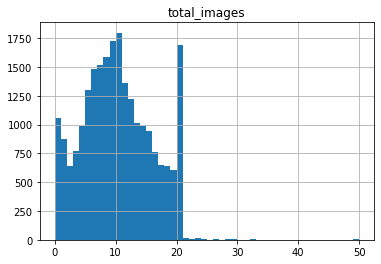

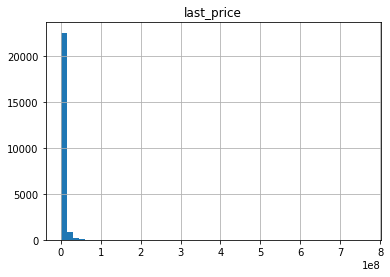

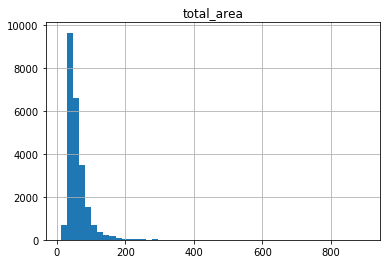

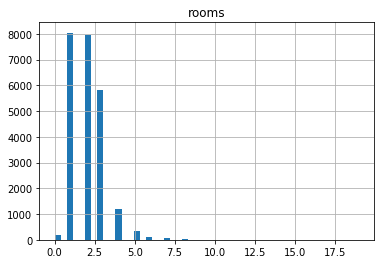

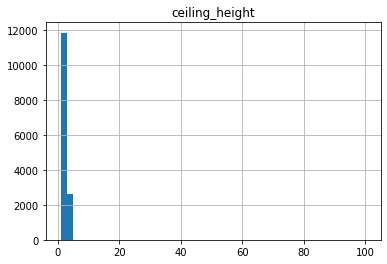

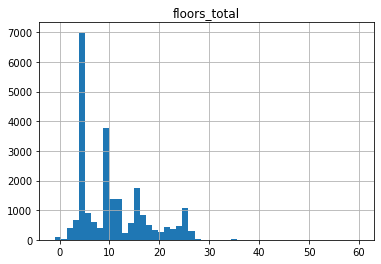

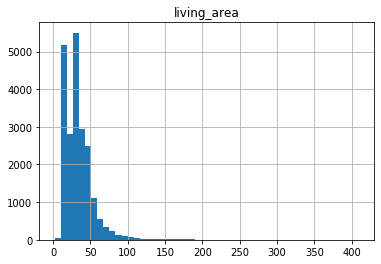

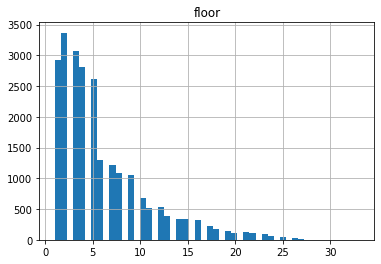

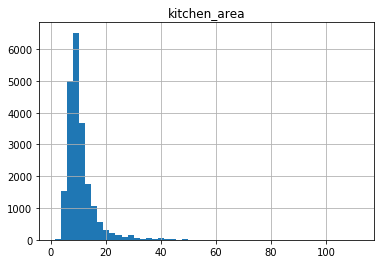

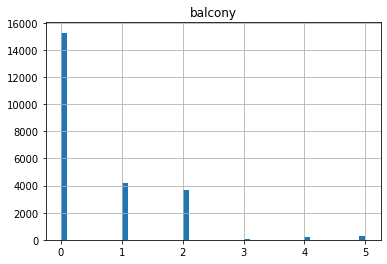

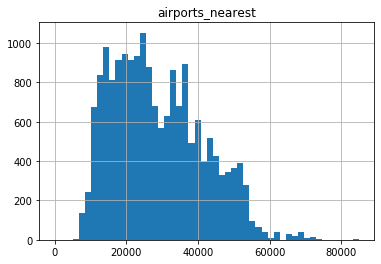

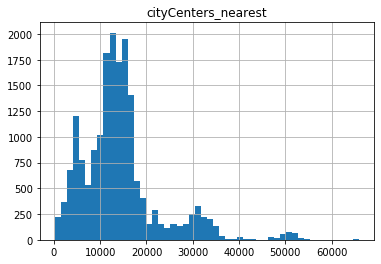

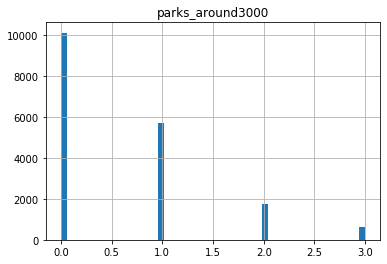

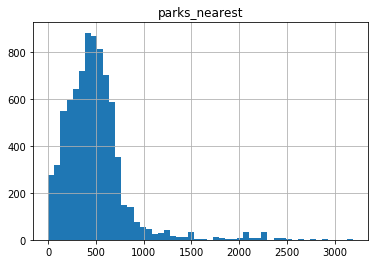

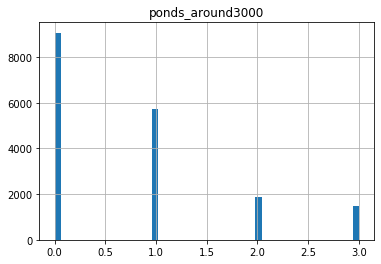

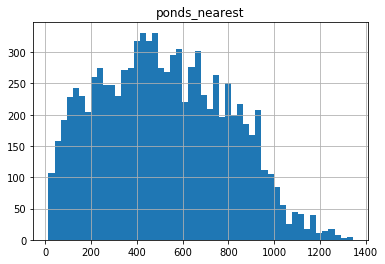

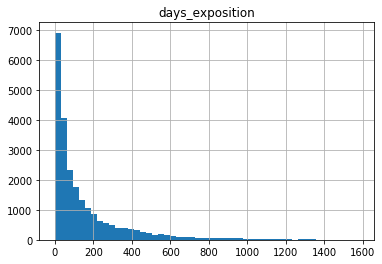

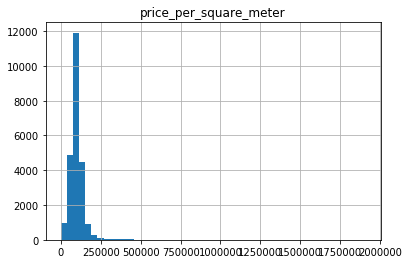

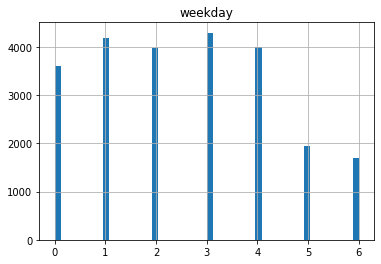

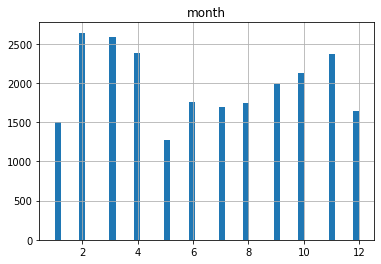

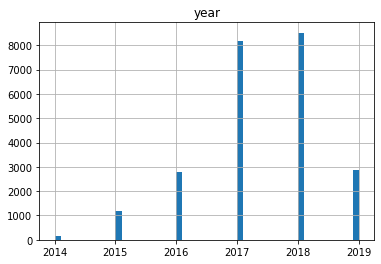

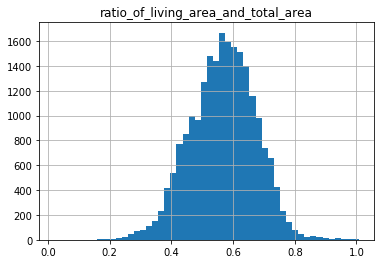

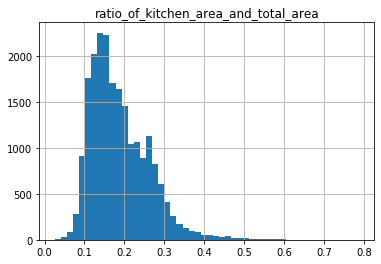

In [33]:
name_columns = ['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor','kitchen_area', 'balcony', 'airports_nearest',
       'cityCenters_nearest', 'parks_around3000', 'parks_nearest',
       'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_per_square_meter', 'weekday', 
          'month','year','ratio_of_living_area_and_total_area','ratio_of_kitchen_area_and_total_area']
for name in name_columns:
    data.hist(name, label=name, bins=50)  

Глобальный вывод:
Больнество гистограмм отражают распределения Пуассона или нормальные распределения с некоторыми смещениями, что близко к действительности. У некоторых параметром присутствуют выбросы. По гистограммам дат, месяцов и лет можем понять активность размещения на неделе в сезона и по годам.

Типичные параметры для объявления:
* 10 изображений объекта продажи
* Средняя цена жилья 4.5 милилона рублей
* Средняя площадь 45 квадратных метров
* Количество комнат 1-2 (однокомнатные и двухкомнатные квартиры)
* Высота потолков 2.5 метра 
* Количество этажей в доме 5 и 9 (классические пятиэтажки и девятиэтажки)
* Жилые площади 20 и 30 квадратных метров
* Средний этаж проживания четвертый
* Площадь кухни в среднем 10 квадратных метров
* Без балкона
* Расположенная от 12 до 15 километров от центра
* Средней ценой за квадратный метр 100000 рублей

In [34]:
data[['days_exposition']].describe() # <вычисление основных статестических параметров столбца days_exposition>

,days_exposition
count,23699.000000
mean,156.474619
std,213.645563
min,-1.000000
25%,22.000000
50%,74.000000
75%,199.000000
max,1580.000000


В среднем квартира продается 74 дня.

### 2 этап.
#### Уберем квартиры с очень высокими ценами и другими необычными параметрами. 

Оценим наличие выбросов с помощью диаграмм размаха.

Функция для фильтрации значений от выбросов и писующая диагррамму размаха с значениями.

In [35]:
def filter_outliers(df, column_name, remove_outliers=False):
    print(column_name)
    df_column = df[column_name]
    quartile_1 = df_column.describe()['25%']
    quartile_3 = df_column.describe()['75%']
    interquartile_range = quartile_3 - quartile_1
    upper_whisker = quartile_1 + 1.5 * interquartile_range
    lower_whisker = max(quartile_1 - 1.5 * interquartile_range, df_column.min())
    
    df.boxplot(column_name)
    plt.ylim(lower_whisker, upper_whisker)
    plt.show()
    
    print('Good values from', lower_whisker, 'to', upper_whisker)
    outliers = df[(df_column < lower_whisker) | (df_column > upper_whisker) |
                 (df_column.isnull())]
    print('Outliers count:', outliers.shape[0])
    
    if remove_outliers:
        df.drop(outliers.index, inplace=True)
        print('Outliers were removed. There are', len(df), 'rows now')
    print('-' * 100)

num_rows_before = data.shape[0]

Фильтрауция наиболее важных харрактеристик.

last_price


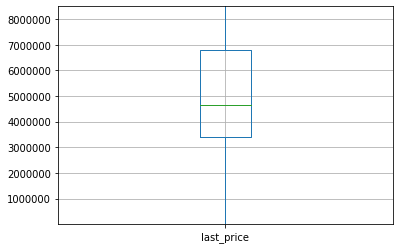

Good values from 12190 to 8500000.0
Outliers count: 3728
Outliers were removed. There are 19971 rows now
----------------------------------------------------------------------------------------------------
total_area


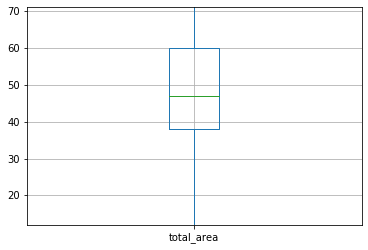

Good values from 12 to 71.0
Outliers count: 2285
Outliers were removed. There are 17686 rows now
----------------------------------------------------------------------------------------------------
living_area


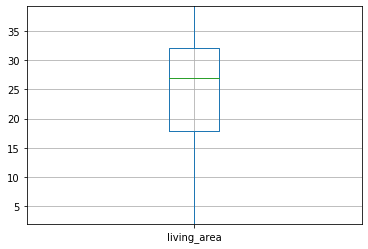

Good values from 2.0 to 39.2
Outliers count: 3345
Outliers were removed. There are 14341 rows now
----------------------------------------------------------------------------------------------------


In [36]:
columns = ['last_price','total_area','living_area']
for column_name in columns:
    filter_outliers(data, column_name, remove_outliers=True)

In [37]:
data.info() # <информация о новом DataFrame>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14341 entries, 1 to 23698
Data columns (total 31 columns):
building_series_id                      3706 non-null object
total_images                            14341 non-null int64
last_price                              14341 non-null int64
total_area                              14341 non-null int64
first_day_exposition                    14341 non-null datetime64[ns]
rooms                                   14341 non-null int64
ceiling_height                          8656 non-null float64
floors_total                            14341 non-null int64
living_area                             14341 non-null float64
floor                                   14341 non-null int64
is_apartment                            14341 non-null bool
studio                                  14341 non-null bool
area                                    14341 non-null int64
open_plan                               14341 non-null bool
kitchen_area                

In [38]:
data.corr()['last_price'] # <кореляция по цене квартир к числовым значениям отфильтрованных данных>

total_images                            0.174737
last_price                              1.000000
total_area                              0.556802
rooms                                   0.258239
ceiling_height                          0.052314
floors_total                            0.298422
living_area                             0.345091
floor                                   0.210003
is_apartment                            0.012177
studio                                 -0.073862
area                                    0.556802
open_plan                              -0.052898
kitchen_area                            0.401388
balcony                                 0.085370
airports_nearest                       -0.046238
cityCenters_nearest                    -0.353576
parks_around3000                        0.053964
parks_nearest                           0.070664
ponds_around3000                        0.062413
ponds_nearest                          -0.010557
days_exposition     

После очистки данных от выбросов наблюдается рост взаимодействия основных параметров квартир.

### Этап 3.
#### Какие факторы больше всего влияют на цену. Отдельно рассомтрим зависимость цены квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

Исходя и имеющихся новых значений кореляции по цене квартиры после удаления выбросов наиболее важными параметрами будут:
* total_area
* rooms
* living_area
* kitchen_area
* price_per_square_meter

---
Зависимость цены на квадратный метр от количества комнат.

In [39]:
data['price_per_square_meter'].corr(data['rooms']) # <кореляция price_per_square_meter и rooms>

-0.23820579158425995

Чем больше комнат, тем меньше цена за квадратный метр.

---
Зависимость цены квадратного метра от удаления от центра города.

In [40]:
data['price_per_square_meter'].corr(data['cityCenters_nearest']) 
# <кореляция price_per_square_meter и cityCenters_nearest>

-0.434312469620231

Чем дальше от центра города, тем дешевше цена за квадратный метр.

---
Зависимость цены за квадратный метр от расположения квартиры на первом или последнем этажах.

In [41]:
coor_floor_category = data.query('floor_category != "другой"') # <кореляция price_per_square_meter и rooms>

In [42]:
coor_floor_category['price_per_square_meter'].corr(coor_floor_category['floor_category'], method='spearman') 
# <кореляция Спермана price_per_square_meter и rooms>

0.04370343769003894

In [43]:
data.loc[data['floor'] == 1, 'floor_category_num'] = 0 
# <использование метода .loc с условием и выводом строкового значения в новый столбец>
data.loc[data['floor'] == data['floors_total'], 'floor_category_num'] = 2
# <использование метода .loc с условием и выводом строкового значения в новый столбец>
data.loc[(data['floor'] != data['floors_total']) & (data['floor'] != 1), 'floor_category_num'] = 1
# <использование метода .loc с условием и выводом строкового значения в новый столбец>
data['floor_category_num'].head()
# где значения в столлце floor_category_num равные 0 это квартиры на первом этаже, равные 2 на последнем и равные 1 на другом. 

1    0.0
2    1.0
5    1.0
6    1.0
8    1.0
Name: floor_category_num, dtype: float64

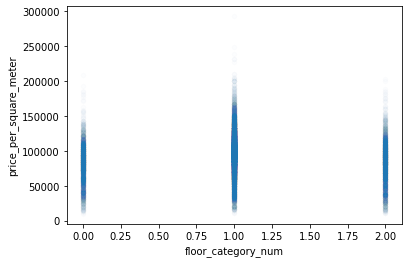

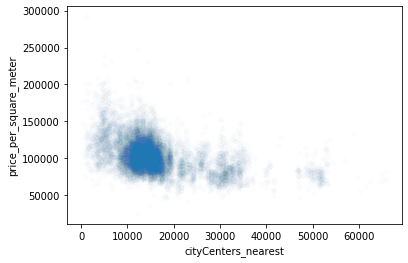

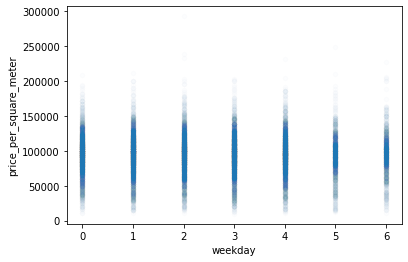

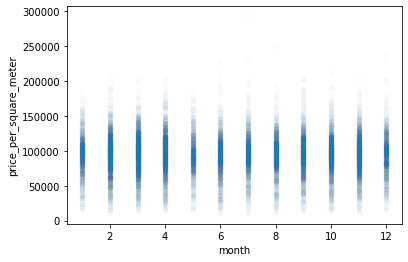

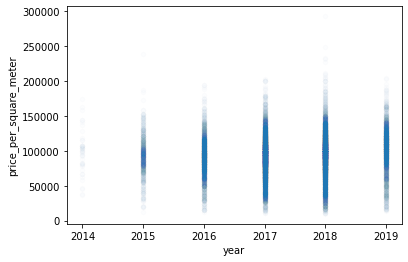

In [44]:
columns_name_1 = ['floor_category_num','cityCenters_nearest','weekday','month','year']
for column_row in columns_name_1:
    data.plot(x= column_row, y='price_per_square_meter', kind='scatter', alpha=0.01)

На первом этаже цена за квадратный метр ниже чем на последнем и в целом цены на первых и послдних этажах ниже других. 

---
Зависимость цены за квадратный метр от растояния до центра города.

In [45]:
data['price_per_square_meter'].corr(data['cityCenters_nearest']) 
# <вычселнение корреляции price_per_square_meter и cityCenters_nearest>

-0.434312469620231

Как мы видим плотное распределение квартир с средней ценой за квадратный метр находится в районе 13 километров от центра города. Так же в этой же области присутствуют различные значения (от минимального до среднего) которые свидетельствуют о плотной разнообразной застройке этого пояса.

---
Кореляции цены за квадратный метр в зависимости от дня недели, месяца и года.

In [46]:
data['price_per_square_meter'].corr(data['weekday']) # <кореляция price_per_square_meter и weekday> 

-0.013907873937845943

Из графика распределения цен за квадратный метр коэфициента кореляции мы видим, что средня цена не меняется в зависимости от дня недели. колеблиться только плотность обьявлений. В выходные она значительно ниже, чем в будние дни. 

In [47]:
data['price_per_square_meter'].corr(data['month']) # <кореляция price_per_square_meter и month>

-0.007878141148442932

Как мы видим цена за квадратный метр практически не меняется о тмесяца к месяцу. Заметно небольшое уменьшение цены в мае.
Плотность объявлений колеблиться и минимальна в мае. При низком спросе и упала средняя цена.

In [48]:
data['price_per_square_meter'].corr(data['year']) # <корреляция price_per_square_meter и year>

0.08941689122523332

Как видно из графика средняя цена за квадратный метр выросла в 2019 году.

### 4 Этап. <span style="color:green;font-size:200%">&#10003;</span>
#### Цена квадратного метра в пригородах.

In [49]:
top_10_cities = data['locality_name'].value_counts().head(11) # <посчитаем уникальные значения и выведем первые 11>
top_10_cities

Санкт-Петербург      8821
посёлок Мурино        405
посёлок Шушары        315
Всеволожск            263
посёлок Парголово     247
Колпино               234
Гатчина               229
Пушкин                226
деревня Кудрово       225
Петергоф              153
Кудрово               148
Name: locality_name, dtype: int64

In [50]:
good_data_top_10_cities = data.query('locality_name in ("Санкт-Петербург","посёлок Мурино", "посёлок Шушары", "Петергоф", "Всеволожск","Пушкин","Колпино","посёлок Парголово","Гатчина","деревня Кудрово","Выборг")')
# <создадим DataFrame с десятью пригородными населенными пунктами с большим количеством объявлений>

In [51]:
good_data_top_10_cities.pivot_table(index="locality_name", values="price_per_square_meter", aggfunc=['median', 'max', 'min'])
# <сгрупируем по населенным пунктам и посчитаем медианные, минимальные и максимальные значения цены за квадратный метр>

,median,max,min
,price_per_square_meter,price_per_square_meter,price_per_square_meter
locality_name,,,
Всеволожск,67857.142857,104166.666667,31400.000000
Выборг,59280.792420,96052.631579,18750.000000
Гатчина,68604.651163,105818.181818,18103.448276
Колпино,77694.859038,119402.985075,48214.285714
Петергоф,82894.736842,127272.727273,61340.909091
Пушкин,100000.000000,161538.461538,59836.065574
Санкт-Петербург,104838.709677,292307.692308,24489.795918
деревня Кудрово,94285.714286,141025.641026,63723.323077


Как видно из медианных значений цена за квадратный метр в области немного ниже чем в Санкт-Петербурге и отличается в разных населенных пунктах. 

### Этап 5
#### Выделим сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Сравним корреляцию основных факторов с ценой по всем предложениям в выборке.

Text(0.5, 1.0, 'Распределение жилой площади на расстоянии от центра города.')

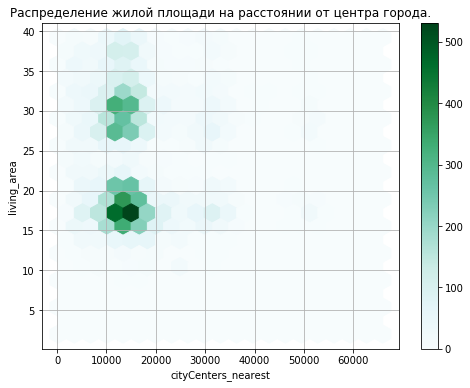

In [52]:
data.plot(x='cityCenters_nearest', y='living_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
# <построим график распределения плотности жилой площади взависимости от расстояния от центра>
plt.title('Распределение жилой площади на расстоянии от центра города.')

Text(0.5, 1.0, 'Распределение количества комнат на растоянии от центра города')

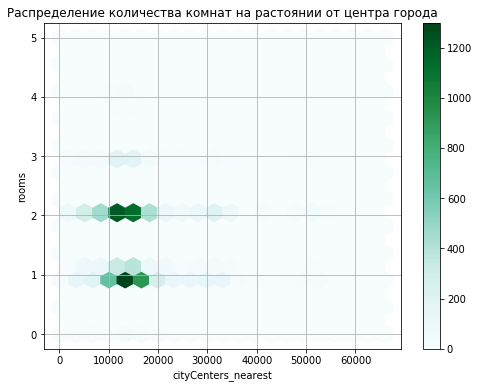

In [53]:
data.plot(x='cityCenters_nearest', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
# <построим график распределения плотности количества комнат взависимости от расстояния от центра>
plt.title('Распределение количества комнат на растоянии от центра города')

Оценив данные из таблицы и графиков примем за границу центра города и пригорода 7000 метров от центра.

In [54]:
corr_data_in_center = data.query('cityCenters_nearest <= 7000 and locality_name == "Санкт-Петербург"')
# <сортируем значения в центра города>

In [55]:
corr_data_in_center.pivot_table(index="locality_name", values=["rooms","total_area"], aggfunc=['median', 'max', 'min'])
# <сводная по месту в центра города, значения комнаты и общая площадь и вычесляем медиану, максимум и минимум>

median              max              min           
                 rooms total_area rooms total_area rooms total_area
locality_name                                                      
Санкт-Петербург      2         47     4         71     0         12

In [56]:
corr_data_in_outskirts = data.query('cityCenters_nearest > 7000 and cityCenters_nearest < 14000 and locality_name == "Санкт-Петербург"')
# <сортируем значения в пригороде>

In [57]:
corr_data_in_outskirts.pivot_table(index="locality_name", values=["rooms","total_area"], aggfunc=['median', 'max', 'min'])
# <сводная по месту на окраине города, значения комнаты и общая площадь и вычесляем медиану, максимум и минимум>

median              max              min           
                 rooms total_area rooms total_area rooms total_area
locality_name                                                      
Санкт-Петербург      2         44     5         71     0         14

In [58]:
corr_data_in_center.corr()['last_price'] # <кореляция параметров по цене недвижемости в центре города>

total_images                            0.161916
last_price                              1.000000
total_area                              0.588891
rooms                                   0.224052
ceiling_height                          0.119191
floors_total                            0.182191
living_area                             0.306199
floor                                   0.196526
is_apartment                           -0.027298
studio                                 -0.118181
area                                    0.588891
open_plan                              -0.107207
kitchen_area                            0.388766
balcony                                 0.086149
airports_nearest                        0.055051
cityCenters_nearest                    -0.053612
parks_around3000                        0.034298
parks_nearest                           0.123054
ponds_around3000                       -0.035573
ponds_nearest                           0.074156
days_exposition     

In [59]:
corr_data_in_outskirts.corr()['last_price'] # <корелиция параметров по цене недвижемости на окраине города>

total_images                            0.189299
last_price                              1.000000
total_area                              0.730568
rooms                                   0.289239
ceiling_height                          0.037901
floors_total                            0.304610
living_area                             0.446642
floor                                   0.224850
is_apartment                            0.006338
studio                                 -0.081678
area                                    0.730568
open_plan                              -0.064449
kitchen_area                            0.489551
balcony                                 0.128946
airports_nearest                        0.018436
cityCenters_nearest                    -0.043201
parks_around3000                       -0.002670
parks_nearest                           0.080439
ponds_around3000                        0.103564
ponds_nearest                          -0.074388
days_exposition     

В центре города и на окраинах популярны двухкомнатные квартиры. Различие только в общих площадях. В центре 2-х комнатные квартиры больше по площади. Соответственно и кореляция общей площади с ценой усиливается в центре.Так же в центре усиливается кореляция по количеству комнат. В центрее на цену меньше влияет площадь кухни, этаж и растояние от центра.

### Этап 6. <span style="color:green;font-size:200%">&#10003;</span>
#### Ниболее характерные параметры для апартаментов, студий и квартир свободной планировки и их влияние на цену. Отличие от схожих параметров квартир типовой планировки.

In [60]:
good_data_aso = data.query('is_apartment == True | studio == True |  open_plan == True')
# <срез DataFrame с апартоментами, студиями и квартирами со свободной планировкой>

In [61]:
good_data_aso.describe() # <основный статистические харрактеристики значений нового DataFrame>

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,area,kitchen_area,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday,month,year,ratio_of_living_area_and_total_area,ratio_of_kitchen_area_and_total_area,floor_category_num
count,215.000000,2.150000e+02,215.000000,215.000000,101.000000,215.000000,215.000000,215.000000,215.000000,17.000000,...,132.000000,74.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,17.000000,215.000000
mean,7.883721,3.061452e+06,28.590698,0.195349,3.223960,16.348837,18.798233,8.330233,28.590698,10.621176,...,0.734848,565.148649,109.186047,107981.186724,2.586047,6.893023,2017.362791,0.671986,0.237812,0.948837
std,5.113704,1.084815e+06,7.849633,0.482378,3.194361,7.005618,4.637722,6.208809,7.849633,3.081341,...,0.799426,266.591920,164.301247,27618.319932,1.707813,3.429217,0.836387,0.128545,0.056362,0.377134
min,0.000000,9.457500e+05,15.000000,0.000000,2.500000,3.000000,2.000000,1.000000,15.000000,5.000000,...,0.000000,72.000000,-1.000000,34375.000000,0.000000,1.000000,2015.000000,0.086957,0.116279,0.000000
25%,4.000000,2.335000e+06,24.000000,0.000000,2.700000,11.000000,16.000000,3.000000,24.000000,9.500000,...,0.000000,408.250000,20.500000,91296.296296,1.000000,4.000000,2017.000000,0.609952,0.201724,1.000000
50%,7.000000,2.820000e+06,27.000000,0.000000,2.750000,17.000000,18.000000,7.000000,27.000000,11.000000,...,1.000000,564.000000,45.000000,105285.714286,3.000000,7.000000,2017.000000,0.681818,0.240000,1.000000
75%,11.000000,3.550000e+06,30.000000,0.000000,2.800000,23.000000,20.000000,12.000000,30.000000,12.000000,...,1.000000,791.250000,115.500000,125000.000000,4.000000,10.000000,2018.000000,0.739565,0.277551,1.000000
max,21.000000,8.100000e+06,59.000000,3.000000,27.000000,35.000000,37.600000,25.000000,59.000000,15.900000,...,3.000000,1159.000000,931.000000,231960.000000,6.000000,12.000000,2019.000000,1.008333,0.322581,2.000000


Text(0.5, 1.0, 'Распределение общих площадей в разных типах квартир')

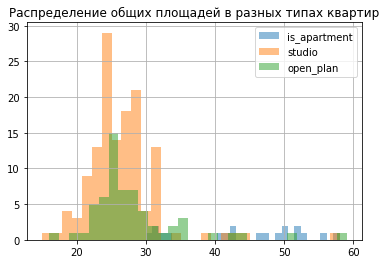

In [62]:
cols = ['is_apartment','studio','open_plan']
for col in cols:
    good_data_aso.loc[good_data_aso[col], 'total_area'].hist(bins=30,alpha=0.5, label=col)
plt.legend()
plt.title('Распределение общих площадей в разных типах квартир')
# <Цикл из гистограмм для отрожения количества разных объявлений и размеры площадей по типам квартир>  

In [63]:
good_data_aso.corr()['last_price'] # <кореляция данных для выборки апартоменты, студии. квартиры свободной планировки>

total_images                            0.230597
last_price                              1.000000
total_area                              0.653826
rooms                                   0.358440
ceiling_height                          0.027792
floors_total                           -0.092069
living_area                             0.482538
floor                                   0.037549
is_apartment                            0.439298
studio                                 -0.145101
area                                    0.653826
open_plan                              -0.122026
kitchen_area                            0.404862
balcony                                 0.100916
airports_nearest                        0.027358
cityCenters_nearest                    -0.156487
parks_around3000                        0.010951
parks_nearest                          -0.038841
ponds_around3000                       -0.078158
ponds_nearest                           0.200578
days_exposition     

In [64]:
good_data_not_aso = data.query('is_apartment == False & studio == False &  open_plan == False')
# <срез типовых квартир из общего Dataframe>

In [65]:
good_data_not_aso.corr()['last_price'] # <кореляция параметров по выборке типовых квартир>

total_images                            0.171745
last_price                              1.000000
total_area                              0.551940
rooms                                   0.244997
ceiling_height                          0.058249
floors_total                            0.313703
living_area                             0.339373
floor                                   0.218518
is_apartment                                 NaN
studio                                       NaN
area                                    0.551940
open_plan                                    NaN
kitchen_area                            0.401231
balcony                                 0.091873
airports_nearest                       -0.049170
cityCenters_nearest                    -0.358268
parks_around3000                        0.051655
parks_nearest                           0.072706
ponds_around3000                        0.065001
ponds_nearest                          -0.012047
days_exposition     

Основные параметры для студий, апортоментов и квартир со свободной планировкой это:
* last_price
* total_area
* rooms
* living_area
* price_per_square_meter

Наиболее важные характеристики квартир типовой планировки:
* last_price
* total_area
* rooms
* living_area
* kitchen_area
* price_per_square_meter

Для выборки студии, апартоменты, квартиры со свободной планировкой общая и жилая площади и количество комнат больше влияют на цену нежели такие же параметры для типовых квартир. С ценой за квадратный метр ситуация обратная. Для типовых квартир значение цены за квадратный метр сильнее корелирует с общей ценой, чем для квартир свободной планировки, студий и апартоментов.  

## Шаг 2. Общий вывод. <span style="color:green;font-size:200%">&#10003;</span>

1. Наиболее важные харрактеристики это:
   * Цена недвижемости
   * Жилая площадь
   * Площадь кухни
   * Цена за квадратный метр
   * Количество комнат
   * Общая площадь.

Гистограммы отражают распределение Пуассона. Следовательно довольно достоверны, но есть аномалии.
Процесс продажи в среднем длиться 74 дня.

2. Изучая аномалии выявили параметры необходимые для оценки их на выбросы. Таки как цена, общая площадь, жилая площадь, цена заквадратный метр. Природы выбросов имеет субъективное происхождения и связана с заполнением пользователями сервиса данных.

3. Исходя из значений кореляции выявленны основные параметры влияющие на ценообразование:
    * Общая, жилая и куханная площади
    * Количество комнат
    * Цена за квадратный метр

Ряд набюдений связанный с колебанием цены за квадратный метр в зависемости от параметров:
 - Чем меньше комнат, тем больше цена за квадратный метр. 
 - Чем дальше от центра города, тем дешевле квадратный метр. 
 - На первом этаже цена за квадратный метр ниже чем на последнем и в целом цены на первых и послдних этажах ниже других. 
 - Цена за квадратный метр практически не меняеться в зависимости от дня ндели, месяца или года. 
 - Не значительное снежение наблюдается в мае и небольшой рост медианы в 2019 году.

4. Среди top10 населенных пунктов после Санкт-Петербурга цена за квадратный метр незначительно колеблица, но меньше чем в Санкт-Петербурге. 

5. В центре города и на окраинах популярны двухкомнатные квартиры. Различие только в общих площадях. В центре 2-х комнатные квартиры больше по площади. Соответственно и кореляция общей площади с ценой усиливается в центре. Так же в центре усиливается кореляция по количеству комнат. В центре на цену меньше влияет площадь кухни, этаж и растояние от центра.

6. Для выборки студии, апартоменты, квартиры со свободной планировкой общая и жилая площади и количество комнат больше влияют на цену нежели такие же параметры для типовых квартир. С ценой за квадратный метр ситуация обратная. Для типовых квартир значение цены за квадратный метр сильнее корелирует с общей ценой, чем для квартир свободной планировки, студий и апартоментов.